# Предварительный анализ данных

## Подключение библиотек

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy
from collections import Counter
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler, scale
from sklearn.impute import KNNImputer


%matplotlib inline

## Загрузка данных

In [2]:
data = pd.read_excel('practice_dataframe.xlsx', usecols=['cat16_city', 'cat11_nationality', 'num1_5', 'num2_5', 'num3_5'])

## Вариант 4. Признаки для анализа:
1. cat16_city
2. cat11_nationality
3. num1_5
4. num2_5
5. num3_5

## Обработка данных

In [3]:
data.head()

,cat11_nationality,cat16_city,num1_5,num2_5,num3_5
0,german,moscow,200.404132,374.849841,537.784
1,German,St. Petersburg,236.691176,757.925894,525.436
2,german,St. Petersburg,-26.114921,556.885394,572.672
3,German,Moscow,-82.764817,915.702660,570.468
4,german,Chelyabinsk,389.350889,595.813259,457.3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cat11_nationality  980 non-null    object 
 1   cat16_city         980 non-null    object 
 2   num1_5             1000 non-null   float64
 3   num2_5             951 non-null    float64
 4   num3_5             971 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.2+ KB


In [5]:
data.describe()

,num1_5,num2_5
count,1000.000000,951.000000
mean,-215.020836,477.456885
std,2304.593027,367.932609
min,-9999.000000,-680.684885
25%,-271.827089,253.822944
50%,233.072300,471.862930
75%,711.946661,695.402804
max,2777.457729,1637.450840


In [6]:
data.cat11_nationality.unique()

array(['german', 'German', 'French', '-', 'italian', nan, 'Italian', ' '],
      dtype=object)

In [7]:
data['cat11_nationality'] = data['cat11_nationality'].replace(
    {'german': 'German', 
     'italian': 'Italian', 
     '-': None, 
     ' ': None,
     np.nan: None}
)
data.cat11_nationality.unique()

array(['German', 'French', None, 'Italian'], dtype=object)

In [8]:
data.cat16_city.unique()

array(['moscow', 'St. Petersburg', 'Moscow', 'Chelyabinsk', 'novosibirsk',
       nan, '-', 'Novosibirsk', ' '], dtype=object)

In [9]:
data['cat16_city'] = data['cat16_city'].replace(
    {'moscow': 'Moscow', 
     'novosibirsk': 'Novosibirsk', 
     '-': None, 
     ' ': None,
     np.nan: None}
)
data.cat16_city.unique()

array(['Moscow', 'St. Petersburg', 'Chelyabinsk', 'Novosibirsk', None],
      dtype=object)

In [10]:
data['num3_5'] = data['num3_5'].replace(
    {'-': np.nan,
     ' ': np.nan}
)
data

,cat11_nationality,cat16_city,num1_5,num2_5,num3_5
0,German,Moscow,200.404132,374.849841,537.784087
1,German,St. Petersburg,236.691176,757.925894,525.436417
2,German,St. Petersburg,-26.114921,556.885394,572.672166
3,German,Moscow,-82.764817,915.702660,570.468156
4,German,Chelyabinsk,389.350889,595.813259,457.299999
...,...,...,...,...,...
995,French,Moscow,1120.816296,652.583299,NaN
996,German,Novosibirsk,-293.568986,334.198157,455.503513
997,German,Novosibirsk,402.936795,-36.892527,509.947684
998,German,Novosibirsk,-157.655030,165.774970,455.301733


In [11]:
copy_data = data.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cat11_nationality  941 non-null    object 
 1   cat16_city         942 non-null    object 
 2   num1_5             1000 non-null   float64
 3   num2_5             951 non-null    float64
 4   num3_5             912 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


## Визуальный анализ данных

Для качественных данных строятся столбчатая и круговая диаграммы.
Для количественных данных строятся гистограмма, оценка плотности распределения и диаграмма "ящик с усами".

In [12]:
# Названия столбцов по их типам
quantitative_columns = [*data.columns[(data.dtypes.values == np.dtype('float64'))]]
categorical_columns = [*data.columns[(data.dtypes.values != np.dtype('float64'))]]

### Категориальные признаки

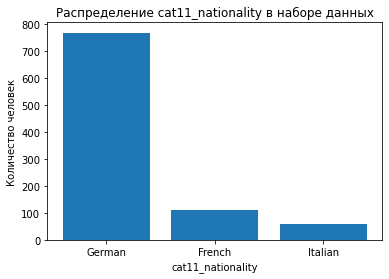

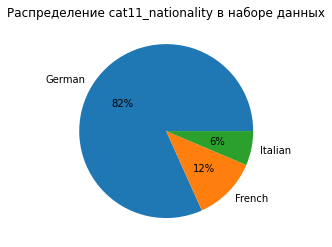

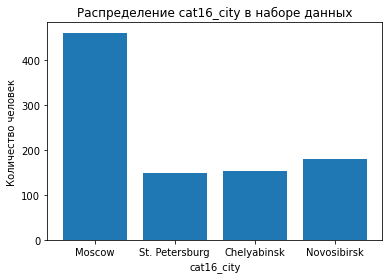

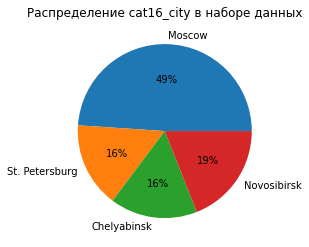

In [13]:
for column in categorical_columns:
    # Столбчатая диаграмма
    counts = Counter(data[column].dropna())
    plt.bar(counts.keys(), counts.values())
    plt.title(f'Распределение {column} в наборе данных')
    plt.xlabel(column)
    plt.ylabel('Количество человек')
    plt.show()
    
    # Круговая диаграмма
    plt.pie(counts.values(), labels=counts.keys(), autopct='%1.0f%%')
    plt.title(f'Распределение {column} в наборе данных')
    plt.show()

### Количественные признаки

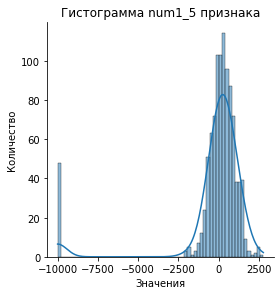

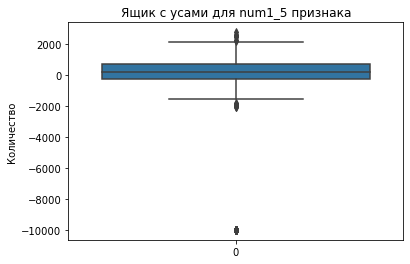

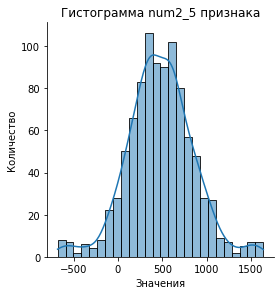

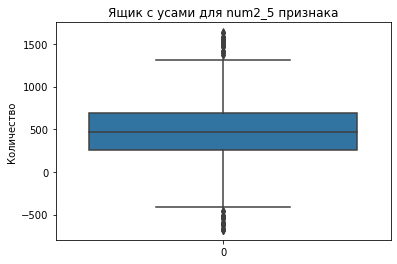

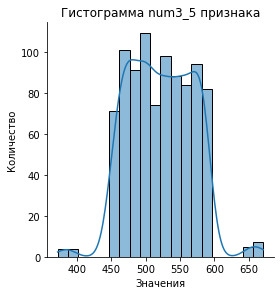

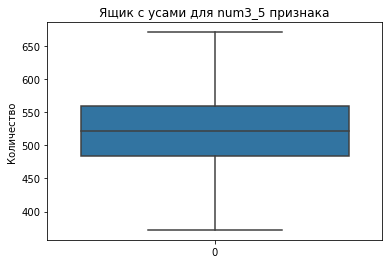

In [14]:
for column in quantitative_columns:
    # Гистограмма + kde
    sns.displot(data[column], kde=True, height=4)
    plt.title(f'Гистограмма {column} признака')
    plt.xlabel('Значения')
    plt.ylabel('Количество')
    plt.show()
    # Ящик с усами
    sns.boxplot(data=data[column])
    plt.title(f'Ящик с усами для {column} признака')
    plt.ylabel('Количество')
    plt.show()

## Поиск аномальных значений

In [15]:
# Метод квартилей
def quartile_method(dataset, low=0.05, high=0.95):
    columns = [*dataset.columns[(dataset.dtypes.values == np.dtype('float64'))]]
    q1 = dataset[columns].quantile(low)
    q3 = dataset[columns].quantile(high)
    iqr = q3 - q1
    filtered_dataset = dataset[~((dataset[columns] < (q1 - 1.5 * iqr)) |
                                 (dataset[columns] > (q3 + 1.5 * iqr))).any(axis=1)]
    abnormal_data = dataset[((dataset[columns] < (q1 - 1.5 * iqr)) | 
                              (dataset[columns] > (q3 + 1.5 * iqr))).any(axis=1)]
    return filtered_dataset, abnormal_data

# Метод сигм
def sigm_method(dataset, sigma=3.0):
    columns = [*dataset.columns[(dataset.dtypes.values == np.dtype('float64'))]]
    for column in columns:
        _, lower, upper = scipy.stats.sigmaclip(dataset[column], sigma, sigma)
        if any([np.isnan(lower), np.isnan(upper)]):
            continue
        dataset = dataset[(dataset[column] > lower) & (dataset[column] < upper)]
    return dataset    
    
data = sigm_method(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 937 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cat11_nationality  884 non-null    object 
 1   cat16_city         884 non-null    object 
 2   num1_5             937 non-null    float64
 3   num2_5             889 non-null    float64
 4   num3_5             859 non-null    float64
dtypes: float64(3), object(2)
memory usage: 43.9+ KB


C:\Users\panke\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\panke\anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\panke\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\panke\anaconda3\lib\site-packages\scipy\stats\stats.py:3218: RuntimeWarning: Mean of empty slice.
  c_mean = c.mean()
C:\Users\panke\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## Преобразование данных

In [16]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(data[quantitative_columns])
data[[column + "_scaled" for column in quantitative_columns]] = scaled_values

scale(data.num1_5)

C:\Users\panke\anaconda3\lib\site-packages\pandas\core\indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
<ipython-input-16-f080d1b1f7ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[[column + "_scaled" for column in quantitative_columns]] = scaled_values
C:\Users\panke\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

array([-1.21572864e-01, -6.63251247e-02, -4.66452580e-01, -5.52703162e-01,
        1.66102294e-01,  6.03467270e-01, -7.96979780e-01, -2.19510865e+00,
        5.65761314e-03,  1.85451523e+00, -4.13571583e-01,  7.09783814e-01,
       -8.08742970e-01, -4.02033192e-01, -7.73034133e-01,  6.38704198e-01,
        5.40722541e-01,  1.37527069e+00,  3.20735654e-01,  7.70506828e-01,
        1.06190080e+00, -1.44030399e+00,  2.31175685e-01,  1.85146060e+00,
       -4.50104108e-01, -1.33925761e+00,  2.17505801e-01, -3.65357977e-01,
        6.57507716e-01,  1.52853611e+00, -3.91763403e-01,  1.00876648e+00,
       -8.60660020e-01,  2.50460108e-02,  1.88036379e+00,  3.07047187e-01,
        1.09744231e+00, -2.73380459e-01,  8.69739549e-01,  3.37752015e-01,
        1.22570265e+00,  1.65091174e+00,  1.37185831e+00,  6.72943824e-01,
        1.90299273e+00, -1.18124039e-01,  1.18801434e+00,  1.88491068e+00,
       -9.22941792e-01, -1.17037449e+00, -1.33308171e-01, -5.62529050e-01,
        7.53946307e-01,  

## Заполнение пропусков

### Метод k ближайших соседей

<ipython-input-17-274489ad61c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cat11_nationality'] = data['cat11_nationality'].replace(np.nan, '')
<ipython-input-17-274489ad61c4>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cat11_nationality'] = onehot_encoder.inverse_transform(enc_df.iloc[:, :4])


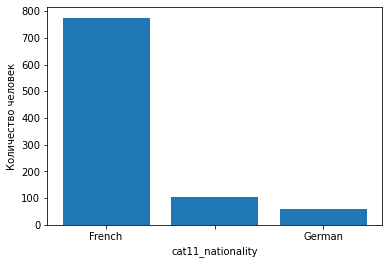

In [17]:
# Onehot encoding
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
data['cat11_nationality'] = data['cat11_nationality'].replace(np.nan, '')
onehot_encoder.fit(data[['cat11_nationality']])
enc_df = pd.DataFrame(onehot_encoder.transform(data[['cat11_nationality']]).toarray())
enc_df[1] = np.where(enc_df[0] == 1, np.nan, enc_df[1])
enc_df[2] = np.where(enc_df[0] == 1, np.nan, enc_df[2])
enc_df[3] = np.where(enc_df[0] == 1, np.nan, enc_df[3])
enc_df[4] = data.num1_5_scaled
enc_df = enc_df.drop(columns=[0])

knn_imputer = KNNImputer()
enc_df = pd.DataFrame(knn_imputer.fit_transform(enc_df))

max_value_index = enc_df.idxmax(axis = 1) 
enc_df[2] = np.where((enc_df[2] >= enc_df[0]) & (enc_df[2] >= enc_df[1]), 1, 0)
enc_df[1] = np.where((enc_df[1] >= enc_df[0]) & (enc_df[1] >= enc_df[2]), 1, 0)
enc_df[0] = np.where((enc_df[0] >= enc_df[1]) & (enc_df[0] >= enc_df[2]), 1, 0)
data['cat11_nationality'] = onehot_encoder.inverse_transform(enc_df.iloc[:, :4])
вф

### Замена самым популярным значением

In [18]:
city_mode = data.cat16_city.mode()
data.cat16_city = data.cat16_city.fillna(city_mode[0])

C:\Users\panke\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### Замена средним значением

In [19]:
data['num1_5_scaled'].fillna(np.mean(data['num1_5_scaled'].dropna()), inplace=True)

C:\Users\panke\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


### Замена медианой

In [20]:
data['num2_5_scaled'].fillna(np.median(data['num2_5_scaled'].dropna()), inplace=True)

### Метод k ближайших соседей

In [21]:
enc_df = knn_imputer.fit_transform(data[['num1_5_scaled', 'num3_5_scaled']])
data['num3_5_scaled'] = enc_df[:, 0]

<ipython-input-21-de12a03ef0b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num3_5_scaled'] = enc_df[:, 0]


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 937 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cat11_nationality  937 non-null    object 
 1   cat16_city         937 non-null    object 
 2   num1_5             937 non-null    float64
 3   num2_5             889 non-null    float64
 4   num3_5             859 non-null    float64
 5   num1_5_scaled      937 non-null    float64
 6   num2_5_scaled      937 non-null    float64
 7   num3_5_scaled      937 non-null    float64
dtypes: float64(6), object(2)
memory usage: 105.9+ KB


{0: 'Chelyabinsk', 1: 'Moscow', 2: 'Novosibirsk', 3: 'St. Petersburg'}


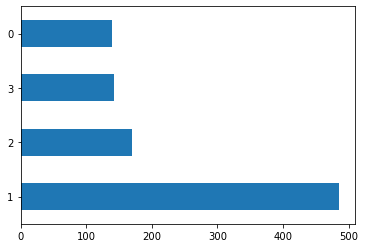

In [23]:
# Label encoding
label_encoder = LabelEncoder()
encoded_city = pd.Series(label_encoder.fit_transform(data['cat16_city']))
encoded_city.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))